In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
train_data['churn_risk_score'].isnull().count()

36992

In [6]:
test_data = pd.read_csv('test.csv')
test_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,...,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,...,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,...,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [7]:
test_customer_id = test_data['customer_id']

In [8]:
#Concatinating train and test data
# Train = 1 i.e Belongs to training data and 0 belongs to test data
train_data['Train'] = 1
test_data['Train'] = 0

In [9]:
new_data = pd.concat([train_data, test_data]).reset_index(drop=True)

In [10]:
new_data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Train
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,1
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,1
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,1
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,1


In [11]:
new_data['customer_id'].value_counts()

fffe4300490044003100380033003500        1
fffe43004900440036003200300032003300    1
fffe43004900440032003600330032003800    1
fffe43004900440034003200390038003900    1
fffe43004900440035003000360031003500    1
                                       ..
fffe43004900440034003500360032003700    1
fffe4300490044003100310038003700        1
fffe4300490044003800310033003000        1
fffe43004900440032003600340035003200    1
fffe43004900440036003300370039003500    1
Name: customer_id, Length: 56911, dtype: int64

In [13]:
#Dropping 'customer_id' colummn as it has all unique values
new_data.drop('customer_id', axis = 1, inplace = True)

In [14]:
new_data.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'Train'],
      dtype='object')

,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Train
0,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,1
1,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,1
2,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,1
3,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,1
4,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,1


In [17]:
new_data['security_no'].value_counts() # total unique values

C47GSAR    1
ZXO3NUE    1
JI33GX4    1
FRAUYR7    1
THUUA8Z    1
          ..
40F05VM    1
9UV85PJ    1
NV04JKG    1
FXAXVCW    1
T3B4O80    1
Name: security_no, Length: 56911, dtype: int64

In [20]:
#Dropping 'security_no' colummn as it has all unique values
new_data.drop('security_no', axis = 1, inplace = True)

KeyError: "['security_no'] not found in axis"

In [21]:
#Dropping 'Name' colummn as it has all unique values
new_data.drop('Name', axis = 1, inplace = True)

In [22]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56911 entries, 0 to 56910
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           56911 non-null  int64  
 1   gender                        56911 non-null  object 
 2   region_category               48535 non-null  object 
 3   membership_category           56911 non-null  object 
 4   joining_date                  56911 non-null  object 
 5   joined_through_referral       56911 non-null  object 
 6   referral_id                   56911 non-null  object 
 7   preferred_offer_types         56464 non-null  object 
 8   medium_of_operation           56911 non-null  object 
 9   internet_option               56911 non-null  object 
 10  last_visit_time               56911 non-null  object 
 11  days_since_last_login         56911 non-null  int64  
 12  avg_time_spent                56911 non-null  float64
 13  a

<AxesSubplot:xlabel='age', ylabel='count'>

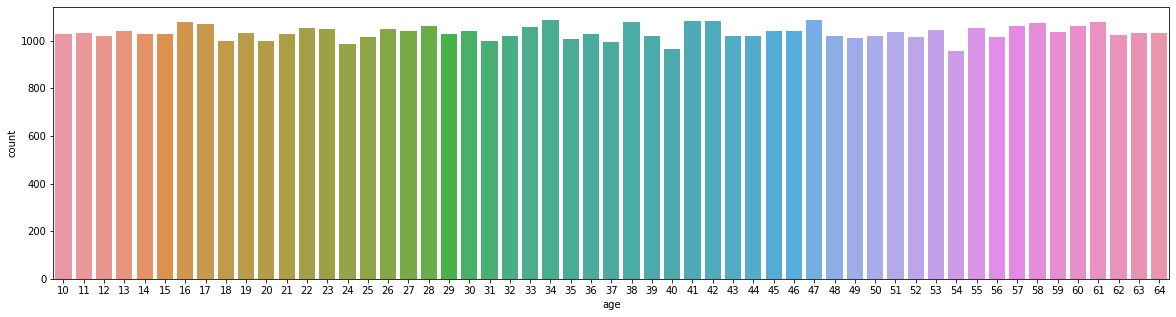

In [24]:
plt.figure(figsize = (20,5))
sns.countplot(new_data['age'])

<AxesSubplot:xlabel='age', ylabel='count'>

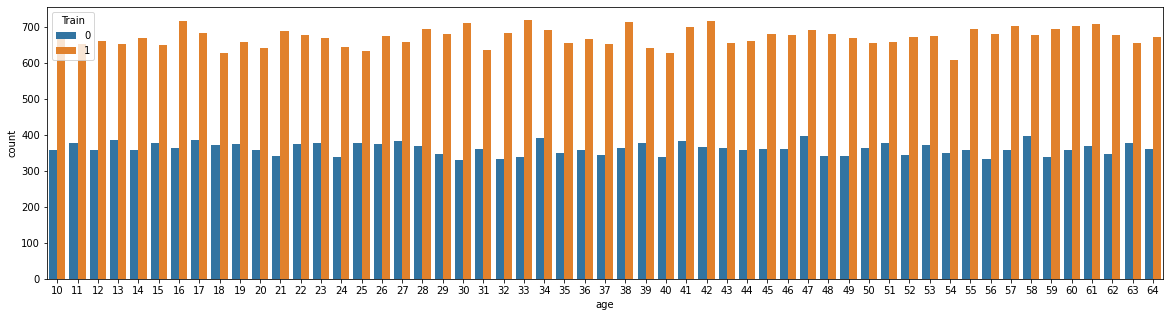

In [25]:
plt.figure(figsize = (20,5))
sns.countplot(new_data['age'], hue = new_data['Train'] )
#In training data, the count of different age groups are almost same i.e between 600-700
#  whereas, in testing data the count is between  300-400

In [26]:
new_data['churn_risk_score'].value_counts()

 3.0    10424
 4.0    10185
 5.0     9827
 2.0     2741
 1.0     2652
-1.0     1163
Name: churn_risk_score, dtype: int64

In [27]:
new_data['churn_risk_score'] = new_data['churn_risk_score'].replace(-1,1)

In [28]:
new_data['churn_risk_score'].value_counts()

3.0    10424
4.0    10185
5.0     9827
1.0     3815
2.0     2741
Name: churn_risk_score, dtype: int64

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

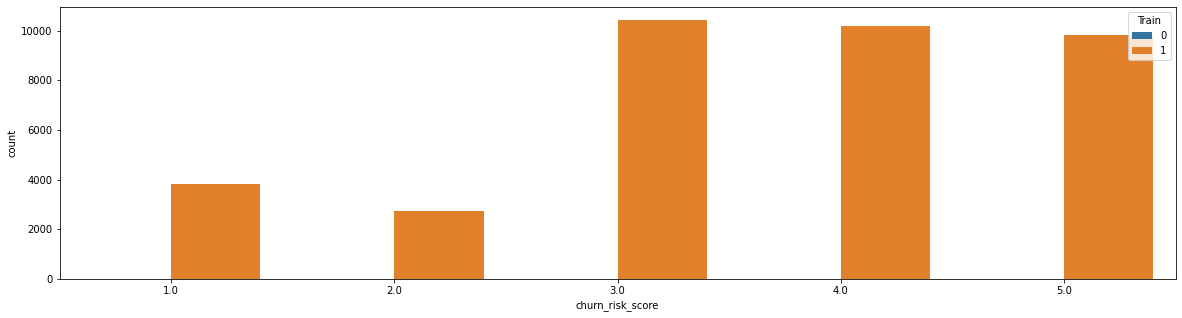

In [29]:
plt.figure(figsize = (20,5))
sns.countplot(new_data['churn_risk_score'], hue = new_data['Train'])
# for the training data, majority customers has churn_risk_score 3 or greater than 3, which is bad

<AxesSubplot:xlabel='gender', ylabel='count'>

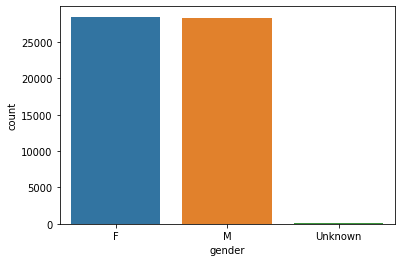

In [30]:
sns.countplot('gender', data = new_data)
# The count for no of males and females is almost same. There are very few whose gender is unknown

<AxesSubplot:xlabel='gender', ylabel='count'>

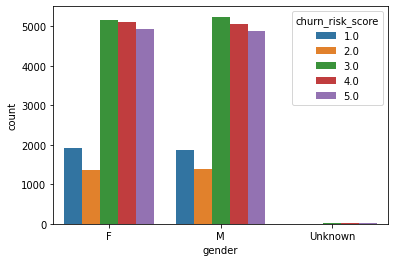

In [31]:
sns.countplot('gender',hue = 'churn_risk_score', data = new_data)
# For Training Data as Test Data has no churn_risk_score column

<AxesSubplot:xlabel='region_category', ylabel='count'>

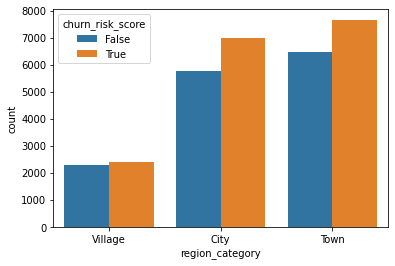

In [32]:
sns.countplot(train_data['region_category'], hue = train_data['churn_risk_score']>3)
# In village region - around 2K out of 4700 people have churn rate > 3 i.e is around 43%
# In City region - around 7K out of 12700 have churn rate > 3 i.e is around 55%
# In Town Region - around 7500 out of 14128 have churn rate > 3 i.e is around 53%

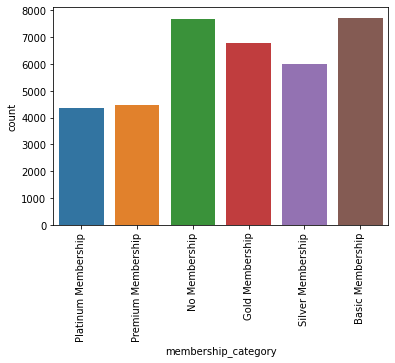

In [33]:
sns.countplot(train_data['membership_category'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:ylabel='membership_category'>

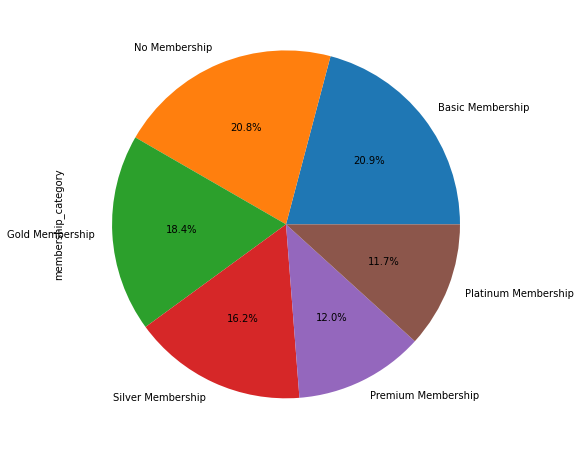

In [34]:
plt.figure(figsize = (8,8))
train_data['membership_category'].value_counts().plot.pie(autopct='%1.1f%%')
# Around 23.7% People come in the category having Platinum Memebership and Premiuim Membership
# Around 41.7% people come in the category having basic or No Memebership
# Around 34.6% people come ine the category having Gold or Silver Memebership

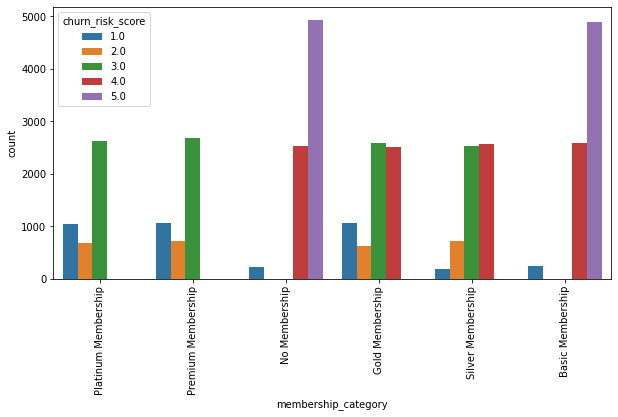

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(new_data['membership_category'], hue = new_data['churn_risk_score'])
plt.xticks(rotation = 90)
plt.show()

Customers having No Membership or Basic Membership have HIGH churn_risk_score of 5.

Customers having Platinum or Premium Membership have churn_risk_score 3 or less than 3.

Customers having Gold or Silver Membership have churn_risk_score 3 or 4.

From these observation, we can conclude that customers having No Membership or Basic Membership have very high chances of unsubscribing the services. Whereas, Customers having Platinum or Premium Membership have very low chances of unsubscribing the services.

In [37]:
new_data['joined_through_referral'].value_counts()

Yes    24332
No     24143
?       8436
Name: joined_through_referral, dtype: int64

In [39]:
new_data['referral_id'].value_counts()

xxxxxxxx    27300
CID43705       13
CID49601       12
CID3979        12
CID63748       12
            ...  
CID60325        1
CID15287        1
CID62187        1
CID56226        1
CID58036        1
Name: referral_id, Length: 14369, dtype: int64

In [38]:
for i, j in zip(new_data.joined_through_referral, new_data.referral_id):
  #print(i, j)
  if (i == '?') and (j != 'xxxxxxxx'):
           new_data['joined_through_referral'] = new_data['joined_through_referral'].replace('?', 'Yes')
  else:
        pass

In [40]:
new_data.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,Train
0,18,F,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,...,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,1
1,32,F,City,Premium Membership,2017-08-28,Yes,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,1
2,44,F,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,1
3,37,M,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,...,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5.0,1
4,31,F,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5.0,1


In [42]:
new_data['joined_through_referral'].value_counts()

Yes    32768
No     24143
Name: joined_through_referral, dtype: int64

<AxesSubplot:ylabel='joined_through_referral'>

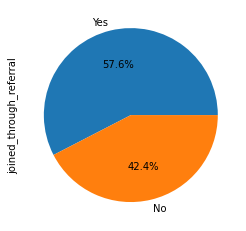

In [43]:
new_data['joined_through_referral'].value_counts().plot.pie(autopct='%1.1f%%')

In [44]:
new_data.drop('referral_id', axis = 1, inplace = True)
# dropping 'referral_id' column has it had a lot of missing values and we anyway have 'joined_through_referral' column to
# give details, like whether the cutomer joined through a referral or not.

In [45]:
new_data['preferred_offer_types'].value_counts()

Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
Name: preferred_offer_types, dtype: int64

<AxesSubplot:ylabel='preferred_offer_types'>

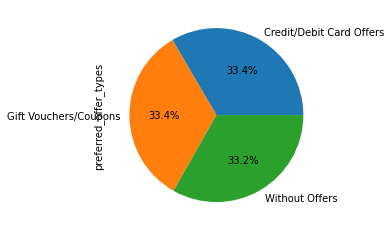

In [46]:
new_data['preferred_offer_types'].value_counts().plot.pie(autopct='%1.1f%%')
# There is equal percentages of customers enjoying different offers.

<AxesSubplot:xlabel='preferred_offer_types', ylabel='count'>

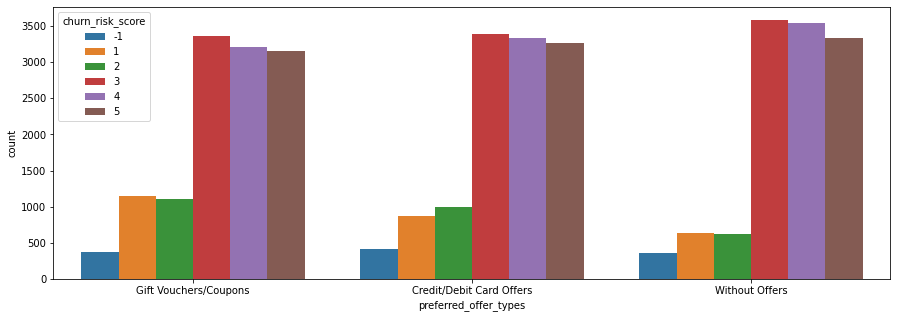

In [47]:
plt.figure(figsize = (15, 5))
sns.countplot(train_data['preferred_offer_types'], hue = train_data['churn_risk_score'])
# Customers without offers have a slightly higher chances of having 'churn_risk_score' >=3

<AxesSubplot:xlabel='membership_category', ylabel='count'>

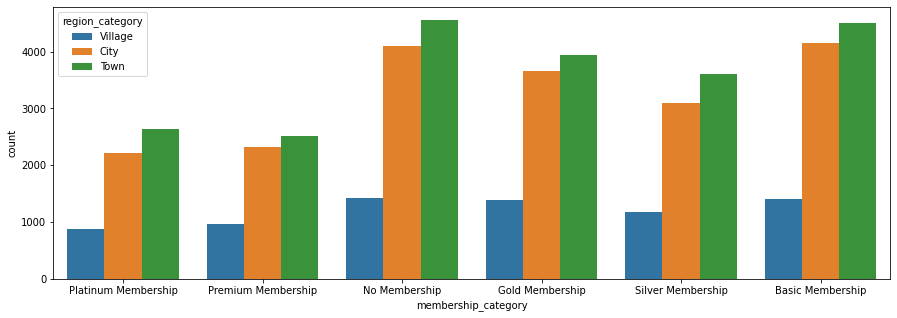

In [49]:
plt.figure(figsize = (15,5))
sns.countplot(new_data['membership_category'], hue = new_data['region_category'])
# In every 'membership_category', majority subscribers are from Town and City.

In [50]:
print(new_data['medium_of_operation'].value_counts())
print('\n internet_option: \n',new_data['internet_option'].value_counts())

Desktop       21376
Smartphone    21281
?              8357
Both           5897
Name: medium_of_operation, dtype: int64

 internet_option: 
 Wi-Fi          19012
Fiber_Optic    18983
Mobile_Data    18916
Name: internet_option, dtype: int64


In [51]:
wifi = []
fibrop = []
mobiledt = []

for i,j in zip(new_data.medium_of_operation, new_data.internet_option):
        #print(i,j)
        if j == 'Wi-Fi':
            wifi.append(i)
        elif j == 'Fiber_Optic':
            fibrop.append(i)
        elif j == 'Mobile_Data':
            mobiledt.append(i)
        else:
            pass

In [53]:
def count_fun(lst, name):
    return lst.count(name)

In [54]:
# ['Desktop', 'Smartphone', '?', 'Both']
lst = wifi
print('wifi Users : \n')
name = 'Desktop'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Smartphone'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = '?'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Both'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

# Mobile Data
lst = mobiledt
print('\nMobile Data Users : \n')
name = 'Desktop'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Smartphone'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = '?'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Both'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

# Fibre Optics
lst = fibrop
print('\nFibre Optics Users : \n')
name = 'Desktop'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Smartphone'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = '?'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

name = 'Both'
print('{} has occurred {} times'.format(name, count_fun(lst, name))) 

wifi Users : 

Desktop has occurred 7198 times
Smartphone has occurred 7036 times
? has occurred 2792 times
Both has occurred 1986 times

Mobile Data Users : 

Desktop has occurred 7074 times
Smartphone has occurred 7089 times
? has occurred 2808 times
Both has occurred 1945 times

Fibre Optics Users : 

Desktop has occurred 7104 times
Smartphone has occurred 7156 times
? has occurred 2757 times
Both has occurred 1966 times



Majority People having 'internet_option' = 'Wi-Fi' has 'medium_of_operation' = 'Desktop', so replacing '?' by 'Desktop' in the Table.

Majority People having 'internet_option' = Fiber_Optic' has 'medium_of_operation' = 'Smartphone', so replacing '?' by 'Smartphone' in the Table.

Majority People having 'internet_option' = 'Mobile_Data' has 'medium_of_operation' = 'Smartphone', so replacing '?' by 'Smartphone' in the Table


In [57]:
new_data[(new_data['medium_of_operation'] == '?') & (new_data['internet_option'] == 'Wi-Fi')].shape

(2792, 22)

In [58]:
condt = (new_data['medium_of_operation'] == '?') & (new_data['internet_option'] == 'Wi-Fi')
new_data['medium_of_operation'] = np.where((condt), 'Desktop', new_data['medium_of_operation'])

condt = (new_data['medium_of_operation'] == '?') & (new_data['internet_option'] == 'Fiber_Optic')
new_data['medium_of_operation'] = np.where((condt), 'Smartphone', new_data['medium_of_operation'])

condt = (new_data['medium_of_operation'] == '?') & (new_data['internet_option'] == 'Mobile_Data')
new_data['medium_of_operation'] = np.where((condt), 'Smartphone', new_data['medium_of_operation'])

In [59]:
new_data['medium_of_operation'].value_counts()

Smartphone    26846
Desktop       24168
Both           5897
Name: medium_of_operation, dtype: int64

Approx 47% of the subscribers have 'medium_of_operation' == Smartphones.

Approx 42% of the subscribers have 'medium_of_operation' == Desktop.

Approx 10% of the subscribers have 'medium_of_operation' == Both.

<AxesSubplot:xlabel='medium_of_operation', ylabel='count'>

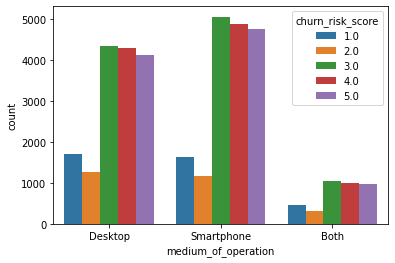

In [61]:
sns.countplot(new_data['medium_of_operation'], hue = new_data['churn_risk_score'])

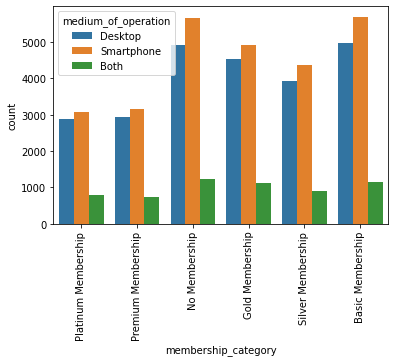

In [63]:
sns.countplot(new_data['membership_category'], hue = new_data['medium_of_operation'])
plt.xticks(rotation = 90)
plt.show()

In [65]:
new_data['avg_time_spent'].isnull().value_counts()

False    56911
Name: avg_time_spent, dtype: int64

(-1000.0, 1000.0)

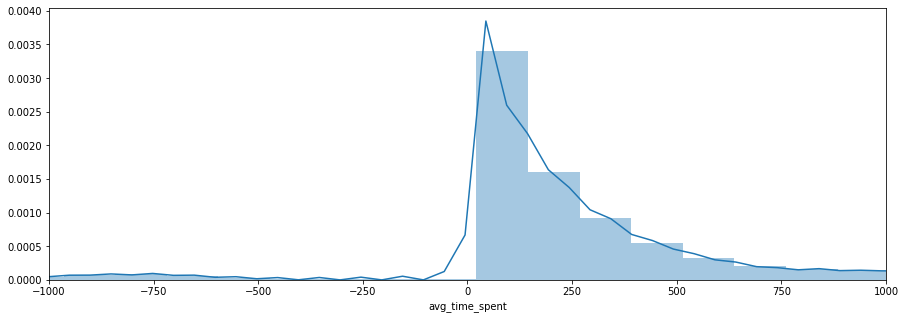

In [66]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['avg_time_spent'])
plt.xlim(-1000,1000)

In [67]:
new_data.loc[new_data['avg_time_spent'] < 0].shape

(2650, 22)

In [68]:
for val in new_data['avg_time_spent']:
    time = str (val)
    if '-' in  time:
        splt = time.split('-')
        #print(splt[1])
        res = splt[1]
        print( float (res))
        #print(new_data['avg_time_spent'][val])

936.7448179192273
930.2078443168743
615.344318961141
687.6295740289631
494.0838770502796
771.4156089065677
900.2103186369052
408.2693518941809
604.0247950327146
739.6765748636568
431.082163122269
849.3020119126413
84.5112875803577
503.7872902334716
890.5594822395143
1635.8801327832282
1116.9632349163735
270.41094835902027
1053.7427174484346
821.935753596298
640.8585904447714
560.4799564526564
483.06950601852304
718.2130917742361
377.9769659050705
542.8269185941352
82.34204509007259
919.5543793196904
836.6448839878389
827.2533097440283
860.1864672449028
800.8663099548016
812.4720485282759
825.842643526508
838.7707857040947
744.850915566878
941.248572078775
616.0386227116906
813.3267042182903
712.4648865405127
1212.8813922593413
13.589827673215039
600.5860057081727
767.7169154346183
901.2962474209238
906.6222808572304
818.9310366906977
780.9671756312573
950.5897652706658
684.9353534928757
533.3929678106424
255.6890381487433
250.52279050866088
716.8848539791072
345.22138485490234
782.4920

781.149962670215
734.433442119652
791.7550605321396
803.3828426143359
543.6293217994481
850.578218235783
923.5082115218668
475.4100293180285
721.1050809536931
795.9208870986096
903.7374537098352
1045.171948916599
519.5927877986346
497.1167189286255
542.7500026231321
947.0208095881488
1001.062449584232
791.6810507932903
773.3399000297893
595.3728877477288
919.2207463409801
887.7109100697714
746.1295668341918
913.7287021316456
1220.3107147022295
1023.2514591352882
658.8503298327696
532.4323700775201
730.6269997469623
1838.166358093016
1107.1060355343686
720.8420124061432
865.8542286310542
803.2821184789302
277.6538224680665
973.4904620952864
869.6765810538545
781.1824314797452
733.0225544224727
963.2265411741713
725.2605795659442
605.4836232494612
612.3932761628289
366.74159928887457
1004.7492693161647
865.1327568231836
814.8269331159172
624.4703295562183
784.919306880768
726.9859211301953
684.1324552881645
812.3738598590556
620.4318452105498
225.04329317153443
792.4492564909666
774.4812

In [69]:
def change_sign(val):
    time = str (val)
    if '-' in  time:
        splt = time.split('-')
        res = splt[1]
        #print(res)
        #print(new_data['avg_time_spent'][val])
        return float(res)
    else:
        return val

In [70]:
new_data['avg_time_spent'] = new_data['avg_time_spent'].apply(change_sign)

(-1000.0, 1000.0)

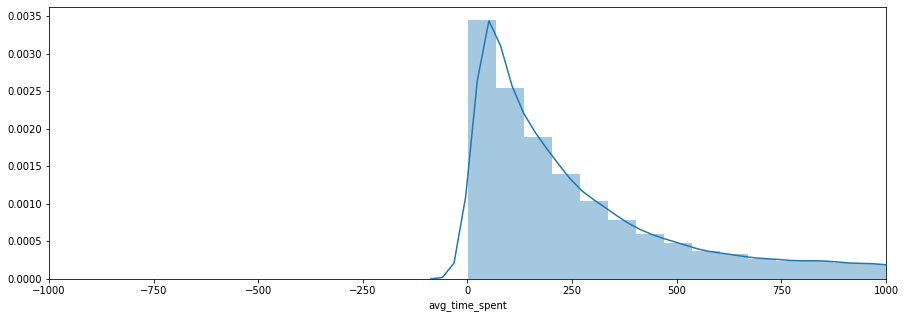

In [71]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['avg_time_spent'])
plt.xlim(-1000,1000)

(-30.0, 30.0)

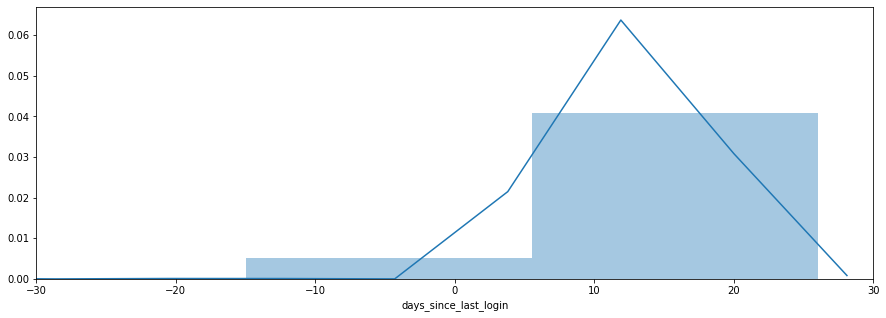

In [74]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['days_since_last_login'])
plt.xlim(-30,30)

In [75]:
new_data.loc[new_data['days_since_last_login'] < 0].shape

(3021, 22)

In [76]:
condt = new_data['days_since_last_login'] < 0
condt


0        False
1        False
2        False
3        False
4        False
         ...  
56906    False
56907    False
56908    False
56909    False
56910    False
Name: days_since_last_login, Length: 56911, dtype: bool

In [88]:
new_data['days_since_last_login'] = np.where((condt), np.nan, new_data['days_since_last_login'])

In [89]:
loc = new_data.loc[new_data['days_since_last_login'] < 0]


(-10.0, 30.0)

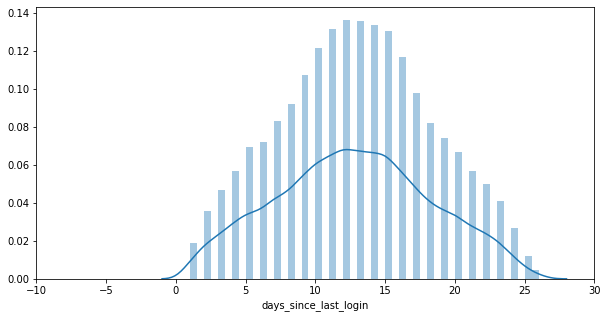

In [90]:
plt.figure(figsize = (10,5))
sns.distplot(new_data['days_since_last_login'])
plt.xlim(-10,30)

<AxesSubplot:xlabel='avg_transaction_value'>

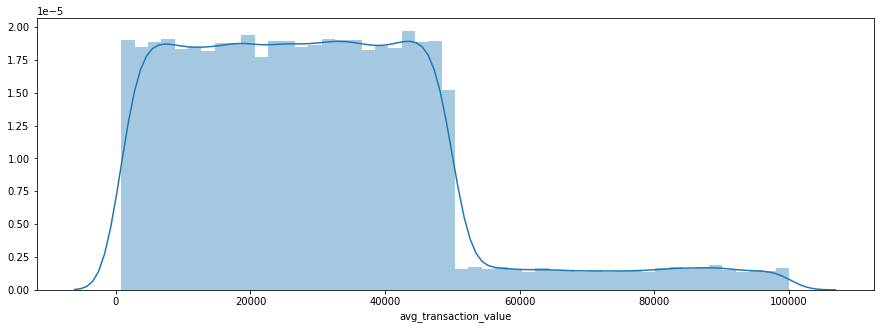

In [91]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['avg_transaction_value'])

In [92]:
dt = new_data.copy()

In [93]:
dt.shape

(56911, 22)

In [94]:
dt = dt.drop(new_data[new_data['avg_frequency_login_days'] == 'Error'].index)

In [95]:
dt.shape

(51474, 22)

In [96]:
new_data['avg_frequency_login_days'] = new_data['avg_frequency_login_days'].replace('Error', np.nan)


<AxesSubplot:xlabel='avg_frequency_login_days'>

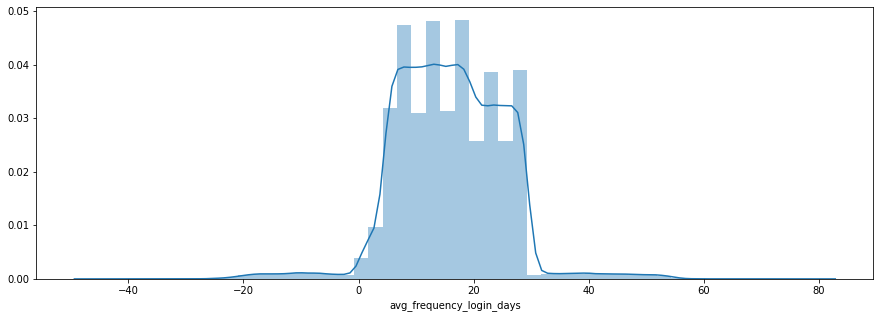

In [97]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['avg_frequency_login_days'])

In [98]:
new_data['avg_frequency_login_days'] = new_data['avg_frequency_login_days'].astype(float)

In [99]:
condt = new_data['avg_frequency_login_days'] < 0 
new_data['avg_frequency_login_days'] = np.where((condt), np.nan, new_data['avg_frequency_login_days'])


<AxesSubplot:xlabel='points_in_wallet'>

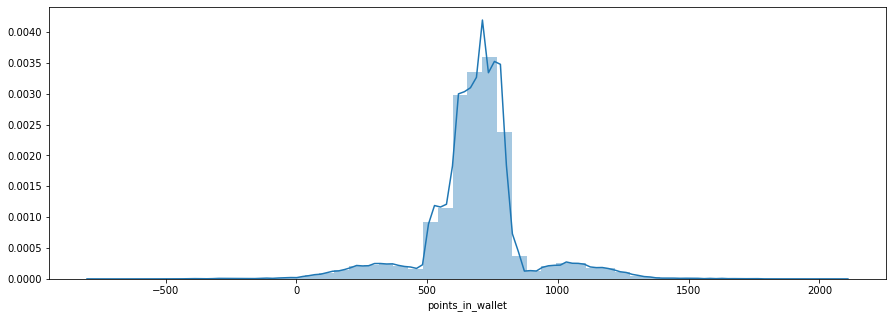

In [100]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['points_in_wallet'])

In [101]:
new_data['points_in_wallet'] = np.where((condt), np.nan, new_data['points_in_wallet'])

<AxesSubplot:xlabel='points_in_wallet'>

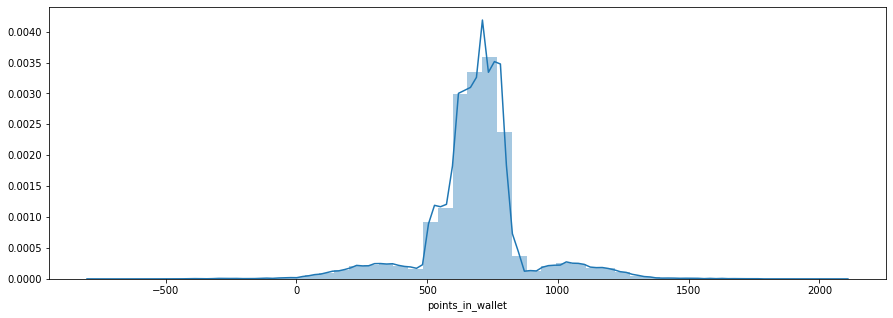

In [103]:
plt.figure(figsize = (15,5))
sns.distplot(new_data['points_in_wallet'])

In [104]:
new_data['points_in_wallet'].isnull().sum()

6367

In [105]:
from sklearn.impute import KNNImputer

<AxesSubplot:xlabel='used_special_discount', ylabel='count'>

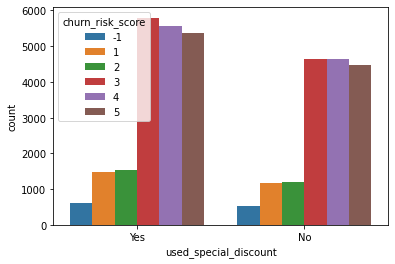

In [106]:
sns.countplot(train_data['used_special_discount'], hue = train_data['churn_risk_score'])

<AxesSubplot:xlabel='past_complaint', ylabel='count'>

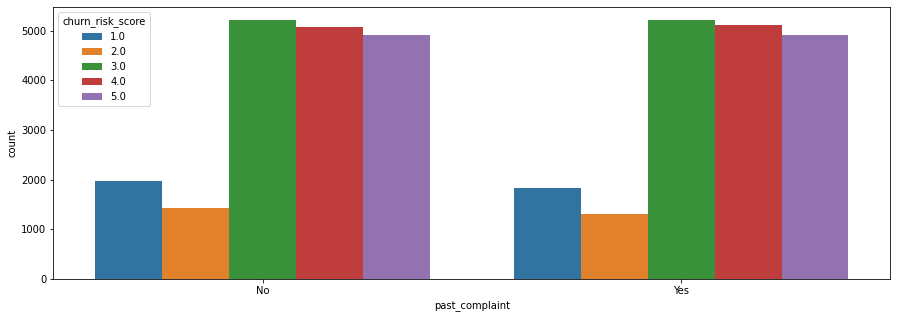

In [108]:
plt.figure(figsize = (15,5))
sns.countplot(new_data['past_complaint'], hue = new_data['churn_risk_score'])

<AxesSubplot:ylabel='complaint_status'>

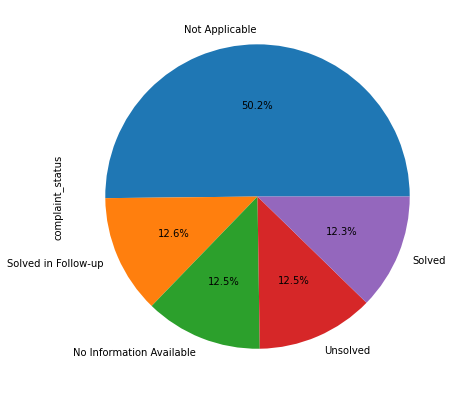

In [109]:
plt.figure(figsize = (7, 7)) 
new_data['complaint_status'].value_counts().plot.pie(autopct = '%1.1f%%')

<AxesSubplot:xlabel='complaint_status', ylabel='count'>

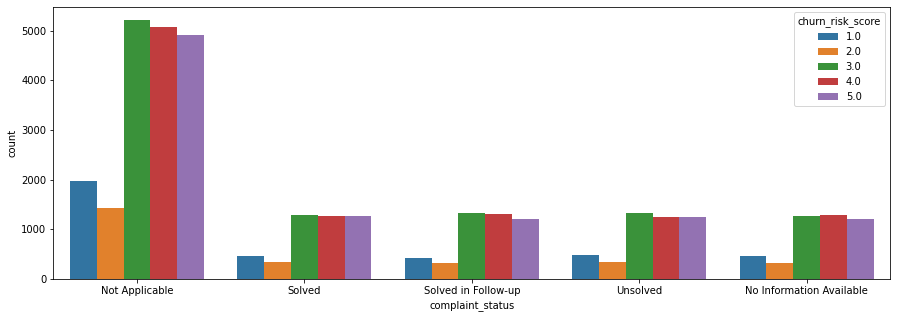

In [110]:
plt.figure(figsize = (15, 5)) 
sns.countplot(new_data['complaint_status'], hue = new_data['churn_risk_score'])

<AxesSubplot:ylabel='feedback'>

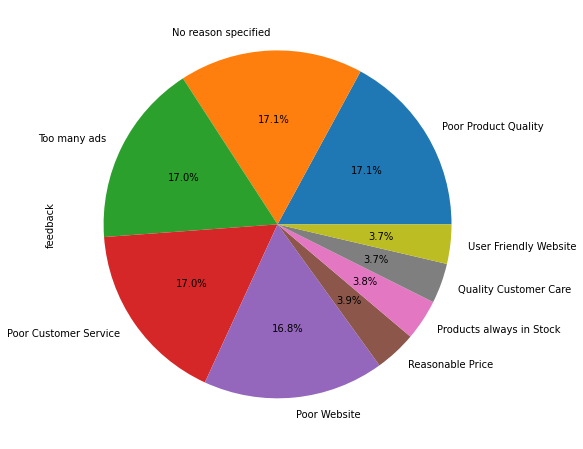

In [111]:
plt.figure(figsize = (8,8))
new_data['feedback'].value_counts().plot.pie(autopct = '%1.1f%%')

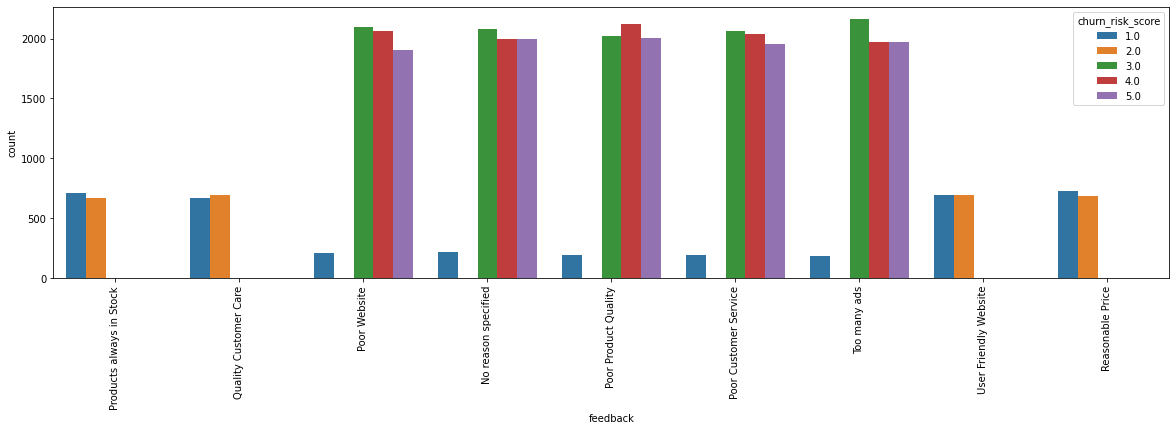

In [112]:
plt.figure(figsize = (20,5))
sns.countplot(new_data['feedback'], hue = new_data['churn_risk_score'])
plt.xticks(rotation = 90)
plt.show()


Customers with feedback - [ 'Products always in Stock', 'Quality Customer Care', 'User Friendly Website', 'Reasonable Price' ] sums to 15.1%. That means only 15.1% of the customers with this feedback has 'churn_risk_score' value < 3.

Customers with feedback - ['Poor Website', 'No reason specified', 'Poor Product Quality','Poor Customer Service', 'Too many ads',] sums to 84.9%. That means 84.9% of the customers with this feedback has 'churn_risk_score' value >= 3.

We can make an observation from this, that only 15% of the customers has given +ve feedback, and the other 85% has given negative feedback

In [115]:
train_data = new_data.loc[new_data['churn_risk_score'].notnull()]

In [124]:
train_data.drop('Train', axis = 1, inplace = True)

<AxesSubplot:>

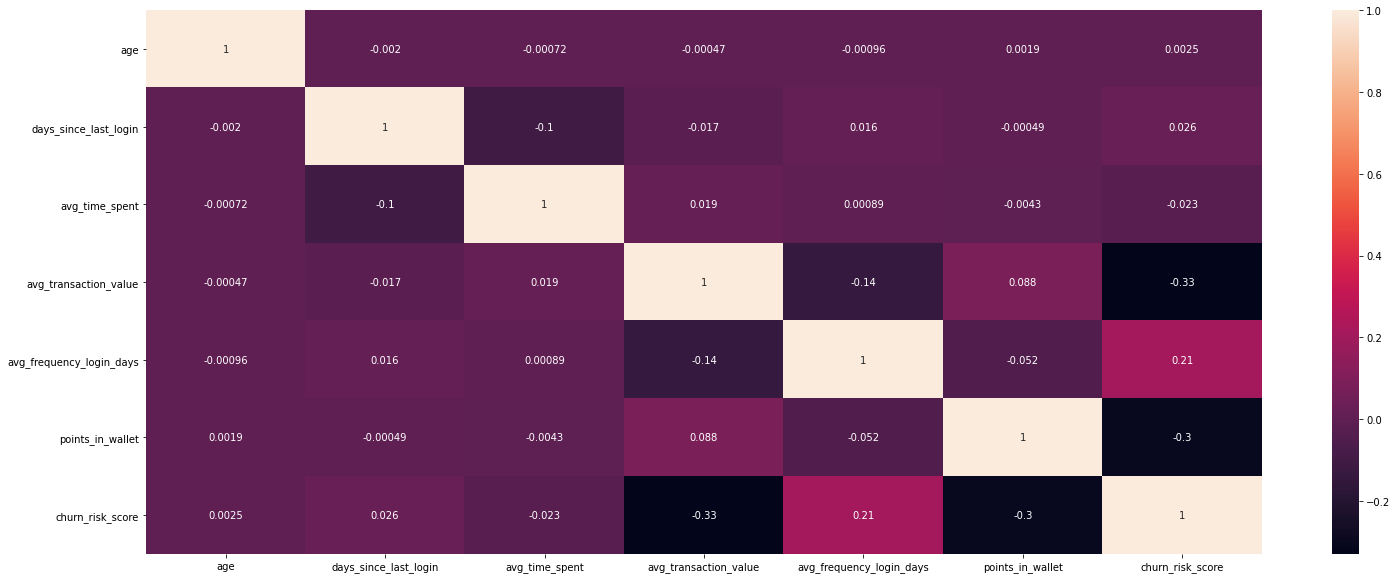

In [125]:
plt.figure(figsize = (25,10))
sns.heatmap(train_data.corr(), annot = True)

In [126]:
new_data.corr()['churn_risk_score']

age                         0.002467
days_since_last_login       0.025731
avg_time_spent             -0.023471
avg_transaction_value      -0.329712
avg_frequency_login_days    0.207489
points_in_wallet           -0.299566
churn_risk_score            1.000000
Train                            NaN
Name: churn_risk_score, dtype: float64

In [120]:
test_data = new_data.loc[new_data['churn_risk_score'].isnull()]


In [121]:
test_data.drop('churn_risk_score', axis=1, inplace = True)

In [122]:
test_data.drop('Train', axis=1, inplace = True)

<AxesSubplot:>

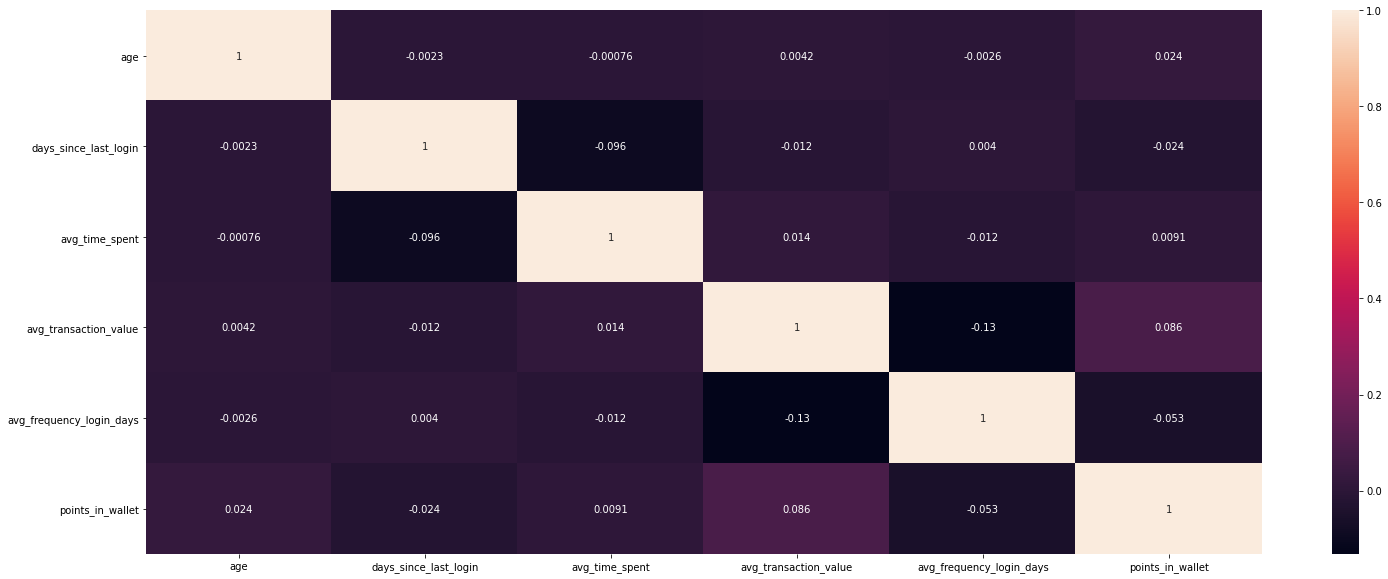

In [123]:
plt.figure(figsize = (25,10))
sns.heatmap(test_data.corr(), annot = True)